In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import glob
import os
import matplotlib.patches as mpatches

## Analysis of the alignment parameters of my database x references

In [ ]:
# Directory where the files are located
directory = "./csvs"

# List of CSV files
files = [f for f in os.listdir(directory) if f.endswith("_nr.csv")]

dfs = []
for file in files:
    # Remove extension
    base_name = file.replace("_nr.csv", "")
    
    # Split into gene and database
    gene, database = base_name.split("_", 1)  # "gene", "database"
    
    # Load CSV
    df = pd.read_csv(os.path.join(directory, file))
    
    # Add extra columns
    df["gene"] = gene
    df["database"] = database
    
    dfs.append(df)

# Concatenate everything into a single DataFrame
df_all_aligned = pd.concat(dfs, ignore_index=True)

# Path to save the merged file
output_path = os.path.join(directory, "df_all_aligned.csv")

# Save as CSV
df_all_aligned.to_csv(output_path, index=False)

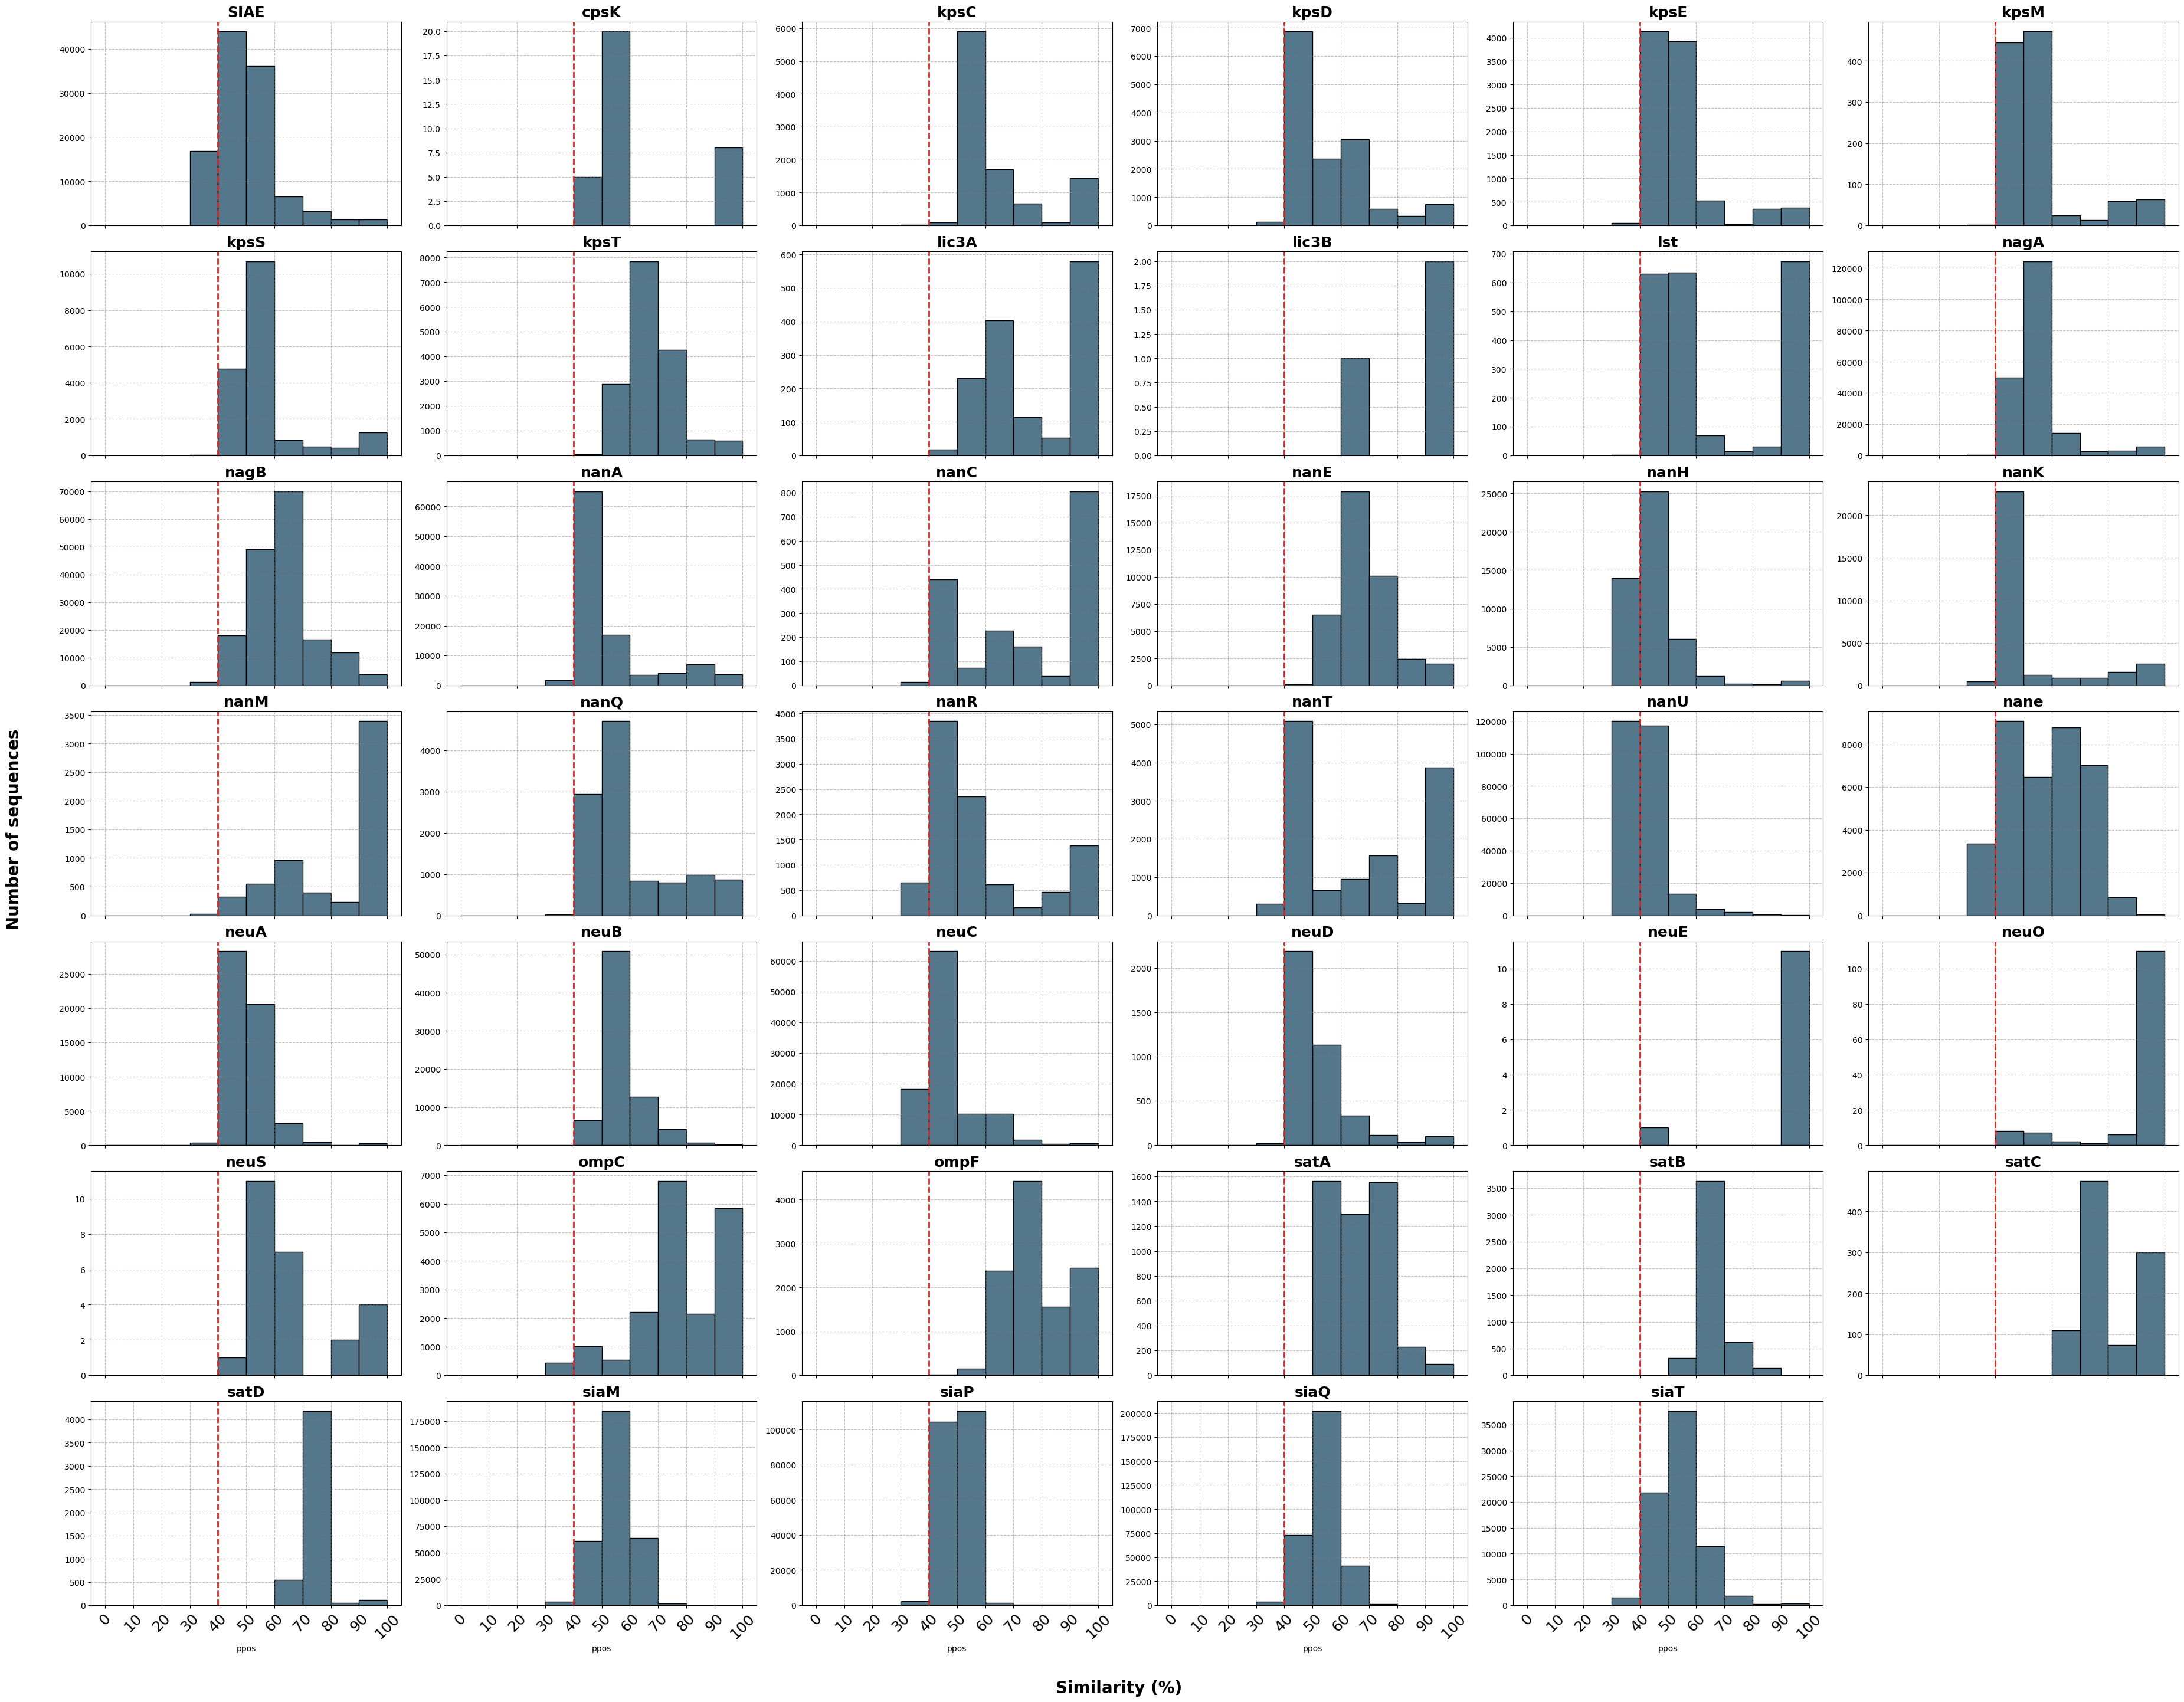

In [ ]:
# Color for histograms
hist_color = "#1b4965"
line_color = "#d62828"  # vertical highlight line

# Read your DataFrame (replace if needed)
df = pd.read_csv("./csvs/df_all_aligned.csv")

# Unique genes
genes = df["gene"].dropna().unique()
genes.sort()

# Define fixed bins for all plots
bins = np.arange(0, df["ppos"].max() + 10, 10)  # from 0 to max, intervals of 10

# Automatic grid
n = len(genes)
ncols = 6
nrows = math.ceil(n / ncols)

# Create figure
fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(ncols * 6, nrows * 4),
    constrained_layout=True
)
axes = axes.flatten()

# Generate one plot per gene
for i, gene in enumerate(genes):
    df_gene = df[df["gene"] == gene]

    # Plot histogram with real counts
    sns.histplot(
        data=df_gene,
        x="ppos",
        bins=bins,
        edgecolor="black",
        color=hist_color,
        ax=axes[i]
    )

    # Vertical reference line at 40
    axes[i].axvline(x=40, color=line_color, linestyle="--", linewidth=2)

    # Default grid
    axes[i].grid(True, linestyle="--", alpha=0.5, color="gray")

    # Plot title
    axes[i].set_title(str(gene), fontsize=18, fontweight="bold")

    # Only show X-axis labels on the last row
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x', labelbottom=False)
    else:
        axes[i].tick_params(axis='x', labelsize=18, rotation=45)
        axes[i].set_xticks(bins)  # use same bin cuts

    # No Y-axis labels
    axes[i].set_ylabel("")

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global labels
fig.text(0.5, -0.02, "Similarity (%)",
         ha="center", va="center",
         fontsize=20, fontweight="bold")

fig.text(-0.02, 0.5, "Number of sequences",
         ha="center", va="center", rotation="vertical",
         fontsize=20, fontweight="bold")

plt.show()

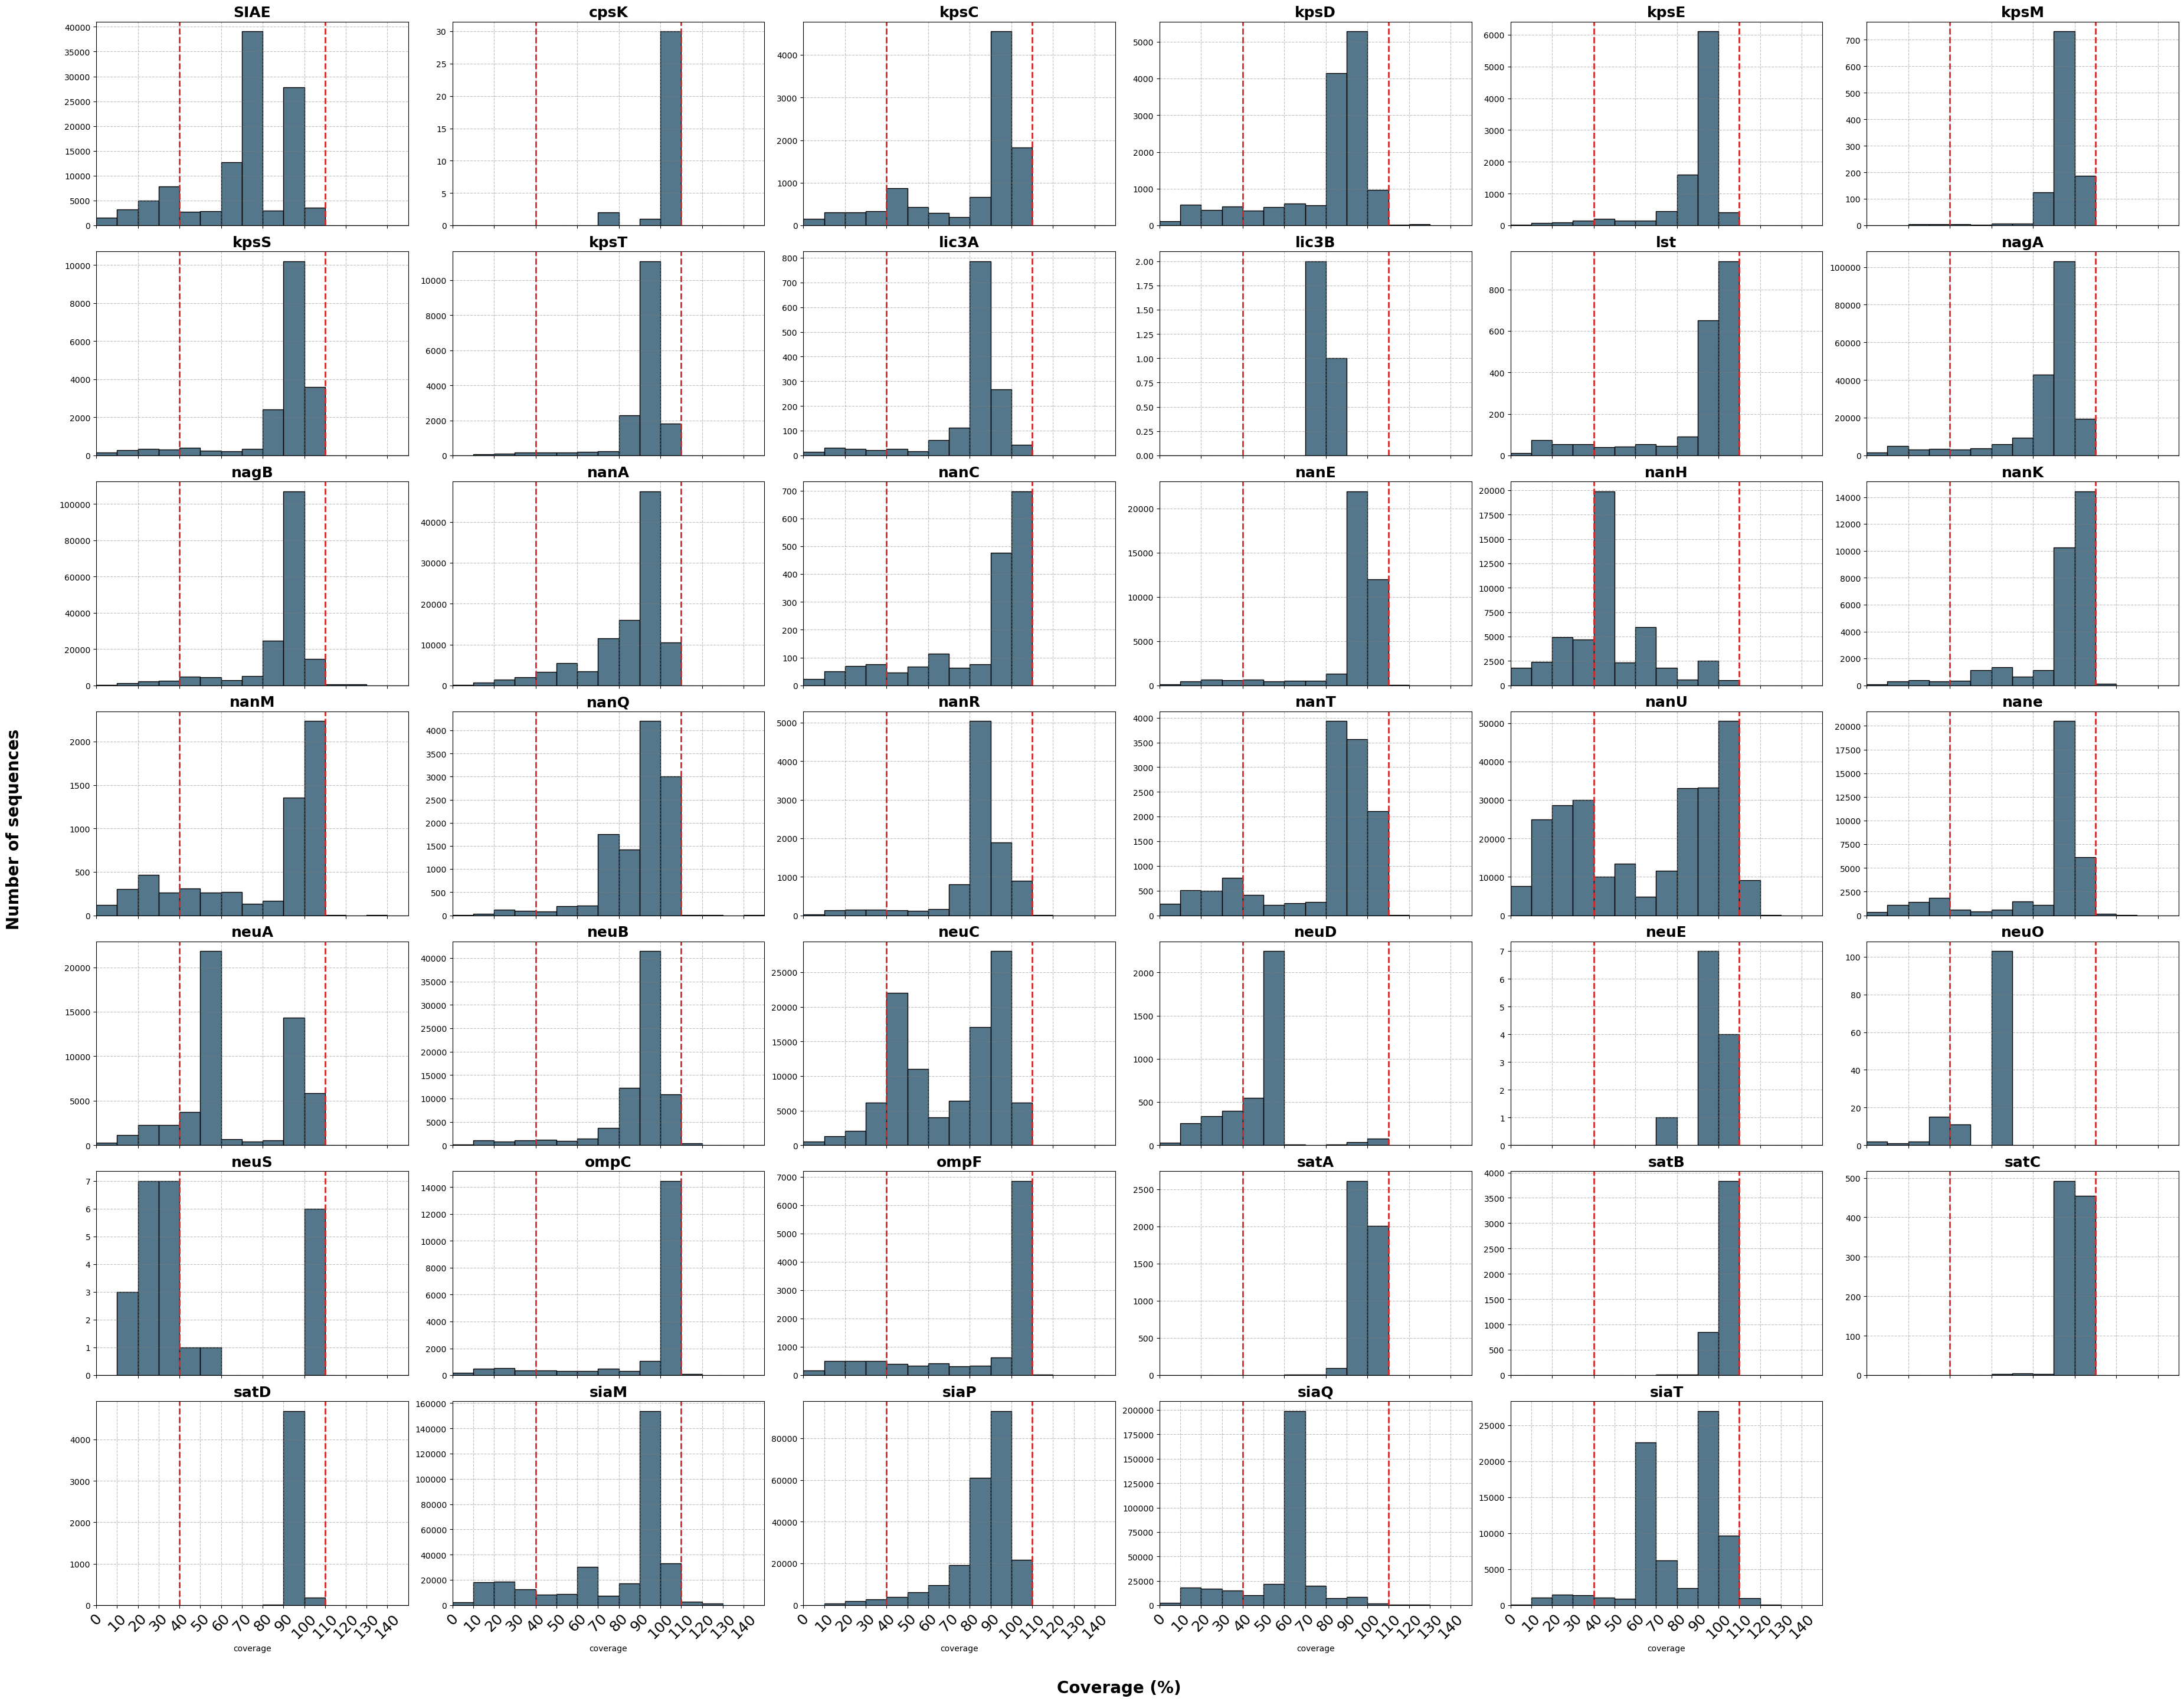

In [ ]:
# Color for histograms
hist_color = "#1b4965"
line_color = "#d62828"  # vertical highlight line

# Read your DataFrame
df = pd.read_csv("./csvs/df_all_aligned.csv")

# Unique genes
genes = df["gene"].dropna().unique()
genes.sort()

# Define fixed bins for all plots
bins = np.arange(0, df["coverage"].max() + 10, 10)  # from 0 to max, 10-unit intervals

# Automatic grid
n = len(genes)
ncols = 6
nrows = math.ceil(n / ncols)

# Create figure
fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(ncols * 6, nrows * 4),
    constrained_layout=True
)
axes = axes.flatten()

# Generate one plot per gene
for i, gene in enumerate(genes):
    df_gene = df[df["gene"] == gene]

    # Plot histogram with real counts
    sns.histplot(
        data=df_gene,
        x="coverage",
        bins=bins,
        edgecolor="black",
        color=hist_color,
        ax=axes[i]
    )

    # Vertical reference lines
    axes[i].axvline(x=40, color=line_color, linestyle="--", linewidth=2)
    axes[i].axvline(x=110, color=line_color, linestyle="--", linewidth=2)

    # Default grid
    axes[i].grid(True, linestyle="--", alpha=0.5, color="gray")

    # Plot title
    axes[i].set_title(str(gene), fontsize=18, fontweight="bold")
    axes[i].set_xlim(0, 150)

    # Only show X-axis labels on the last row
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x', labelbottom=False)
    else:
        axes[i].tick_params(axis='x', labelsize=18, rotation=45)
        axes[i].set_xticks(range(0, 150, 10))

    # No Y-axis labels
    axes[i].set_ylabel("")

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global labels
fig.text(0.5, -0.02, "Coverage (%)",
         ha="center", va="center",
         fontsize=20, fontweight="bold")

fig.text(-0.02, 0.5, "Number of sequences",
         ha="center", va="center", rotation="vertical",
         fontsize=20, fontweight="bold")

plt.show()

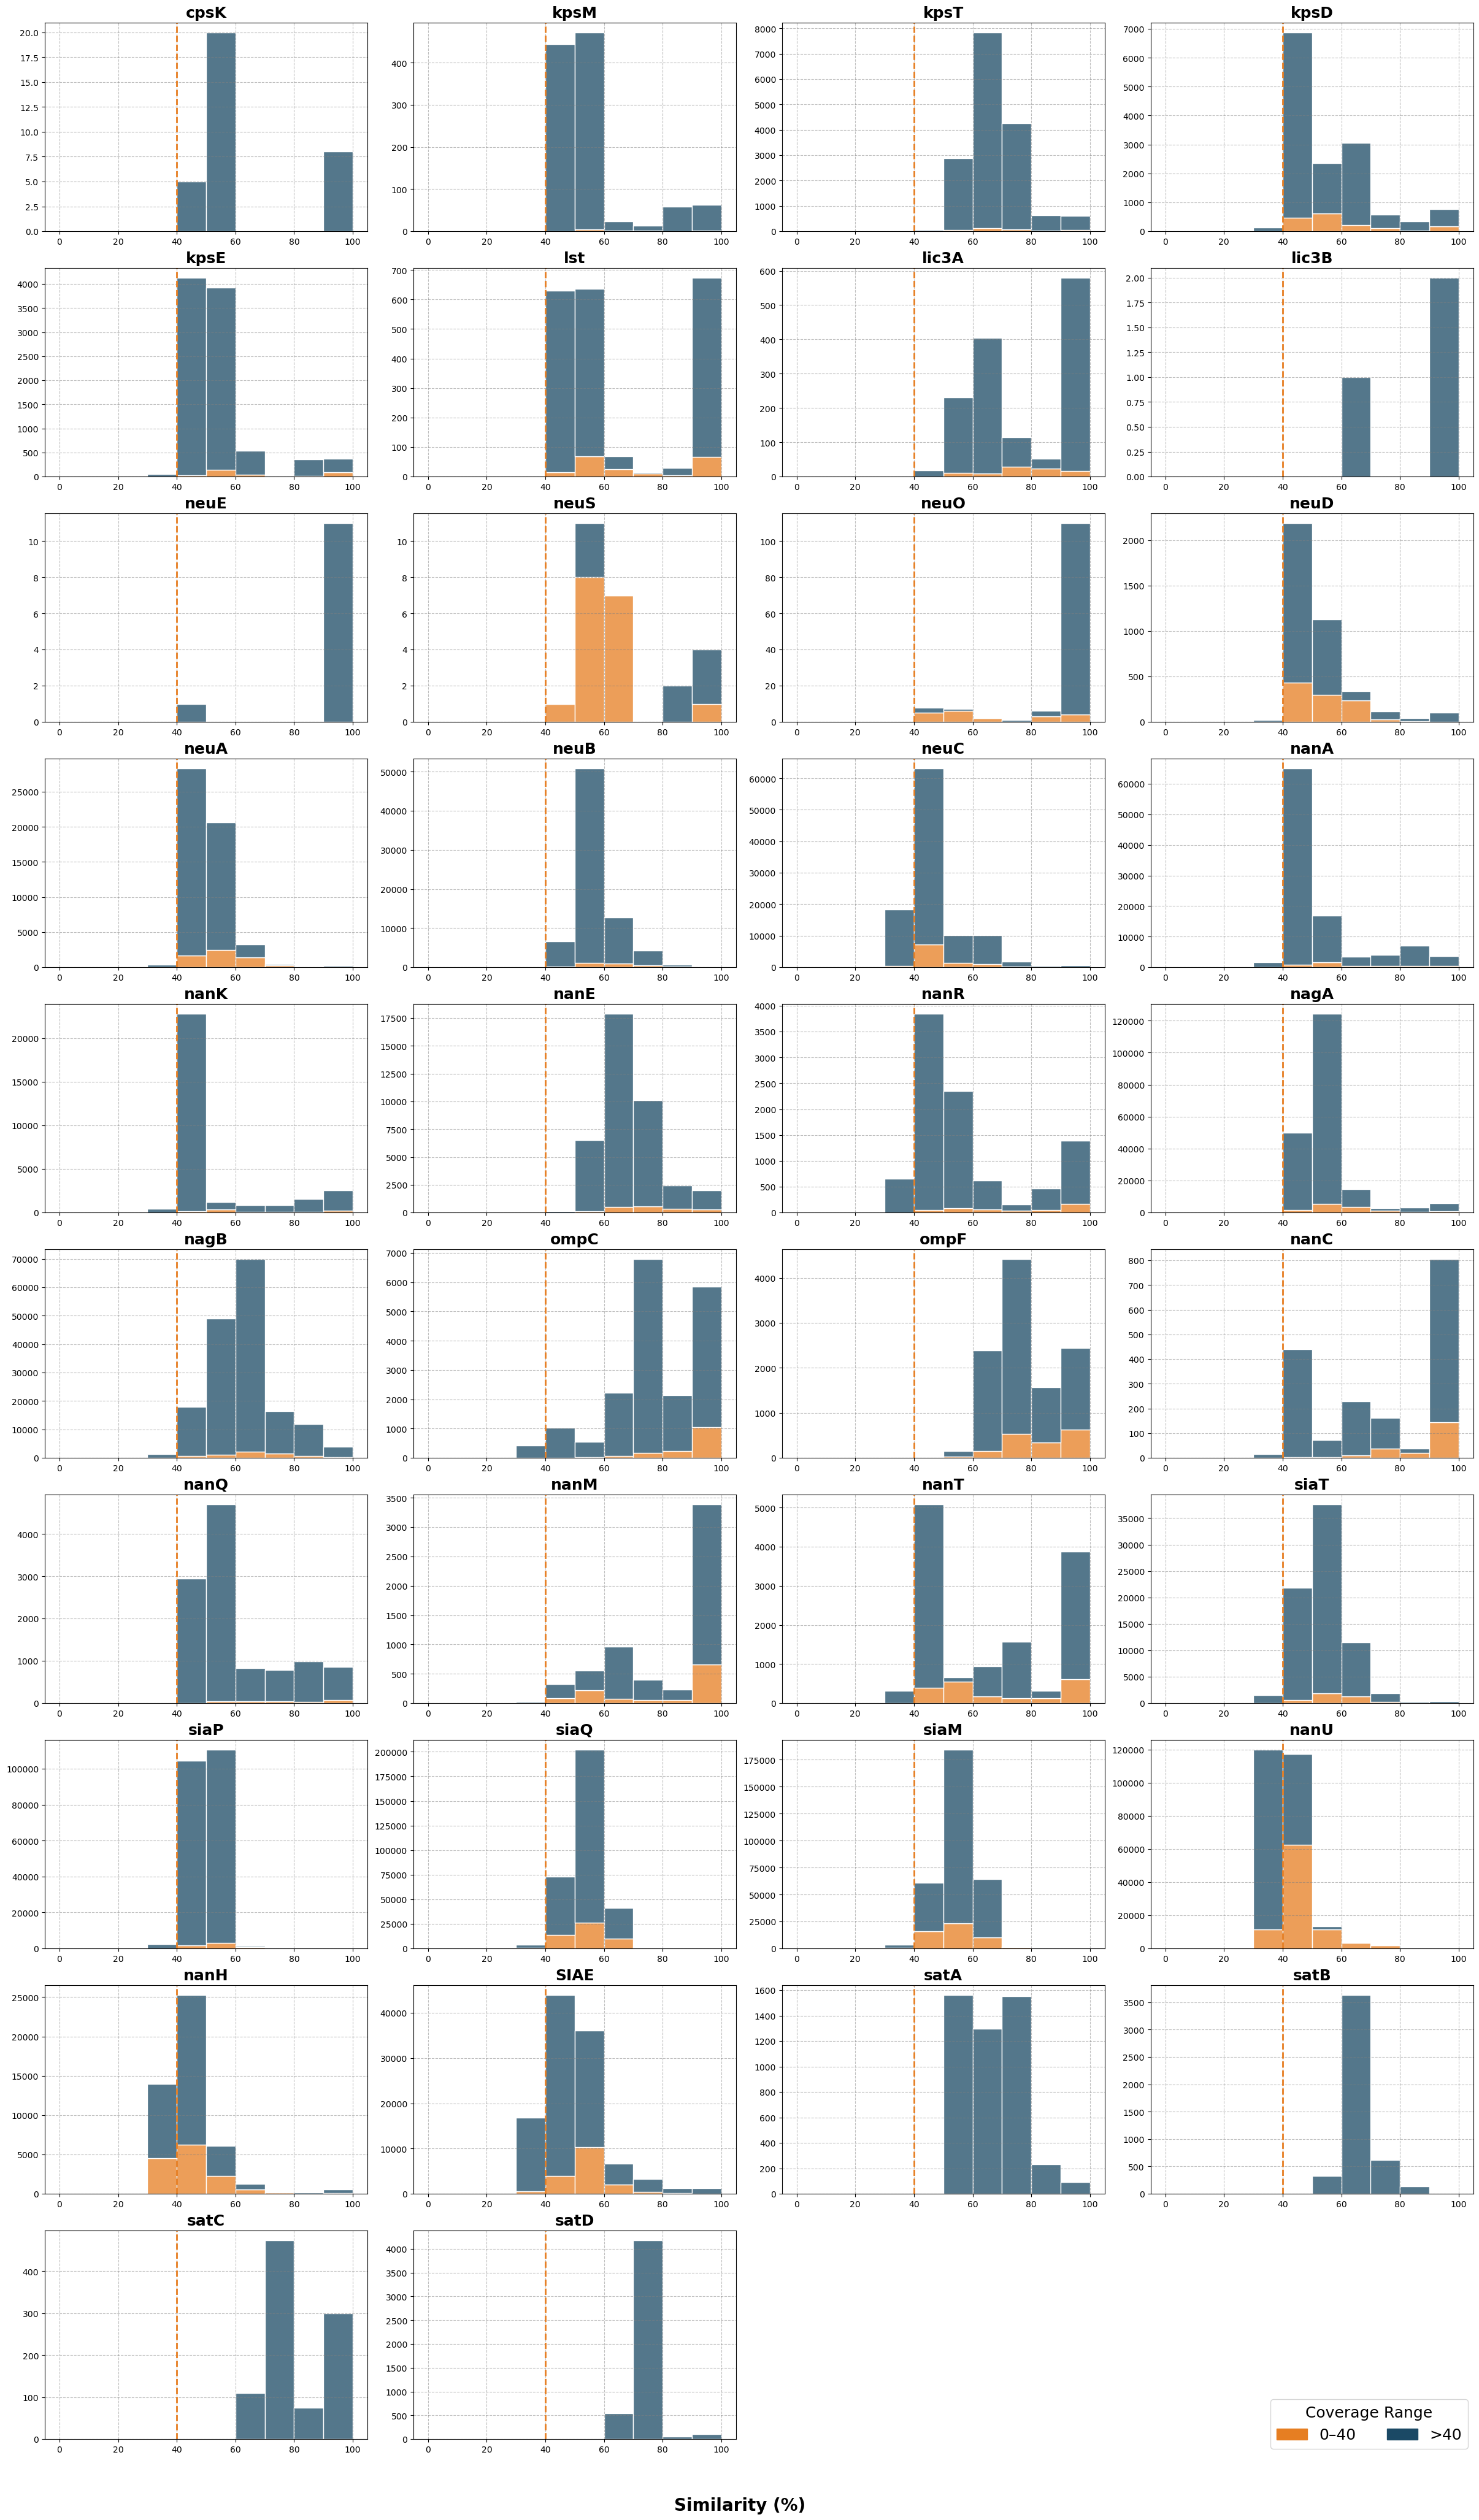

In [ ]:
# Read your DataFrame
df = pd.read_csv("./csvs/df_all_aligned.csv")

# Colors for coverage ranges
coverage_colors = {
    "0–40": "#E67E22",
    ">40": "#1b4965",
}

# Ensure categories are in the correct order
df["coverage_range"] = np.where(df["coverage"] <= 40, "0–40", ">40")
df["coverage_range"] = pd.Categorical(df["coverage_range"], categories=["0–40", ">40"], ordered=True)

order = [
    "cpsK", "kpsM", "kpsT", "kpsD", "kpsE", "lst", "lic3A", "lic3B", "neuE", "neuS",
    "neuO", "neuD", "neuA", "neuB", "neuC", "nanA", "nanK", "nanE", "nanR", "nagA",
    "nagB", "ompC", "ompF", "nanC", "nanQ", "nanM", "nanT", "siaT", "siaP", "siaQ",
    "siaM", "nanU", "nanH", "SIAE", "satA", "satB", "satC", "satD"
]

# Keep only genes that are present in the dataframe, preserving the desired order
genes = [g for g in order if g in df["gene"].unique()]

# Define fixed bins for all plots (for similarity)
bins = np.arange(0, df["ppos"].max() + 10, 10)

# Automatic grid
n = len(genes)
ncols = 4
nrows = math.ceil(n / ncols)

# Create figure
fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(ncols * 6, nrows * 4),
    constrained_layout=True
)
axes = axes.flatten()

# Generate one plot per gene
for i, gene in enumerate(genes):
    df_gene = df[df["gene"] == gene]

    # Histogram with coverage-colored stacked ranges
    sns.histplot(
        data=df_gene,
        x="ppos",
        hue="coverage_range",
        hue_order=[">40", "0–40"],  # 0–40 at the bottom, >40 on top
        bins=bins,
        edgecolor="white",
        linewidth=1,
        palette=coverage_colors,
        multiple="stack",
        ax=axes[i],
        legend=False
    )

    # Vertical similarity threshold line at 40
    axes[i].axvline(x=40, color="#E67E22", linestyle="--", linewidth=2)

    # Default grid
    axes[i].grid(True, linestyle="--", alpha=0.5, color="gray")

    # Plot title
    axes[i].set_title(str(gene), fontsize=18, fontweight="bold")

    # Remove axis labels (X and Y)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global labels
fig.text(0.5, -0.02, "Similarity (%)",
         ha="center", va="center",
         fontsize=20, fontweight="bold")

# --- Manual legend using patches ---
patches = [
    mpatches.Patch(color="#E67E22", label="0–40"),
    mpatches.Patch(color="#1b4965", label=">40")
]

fig.legend(
    handles=patches,
    title="Coverage Range",
    loc="lower right",
    bbox_to_anchor=(1.0, 0.0),
    ncol=2,
    fontsize=18,
    title_fontsize=18,
    markerscale=4
)

plt.savefig("Figure_similarity_coverage.pdf", format="pdf", bbox_inches="tight")

plt.show()

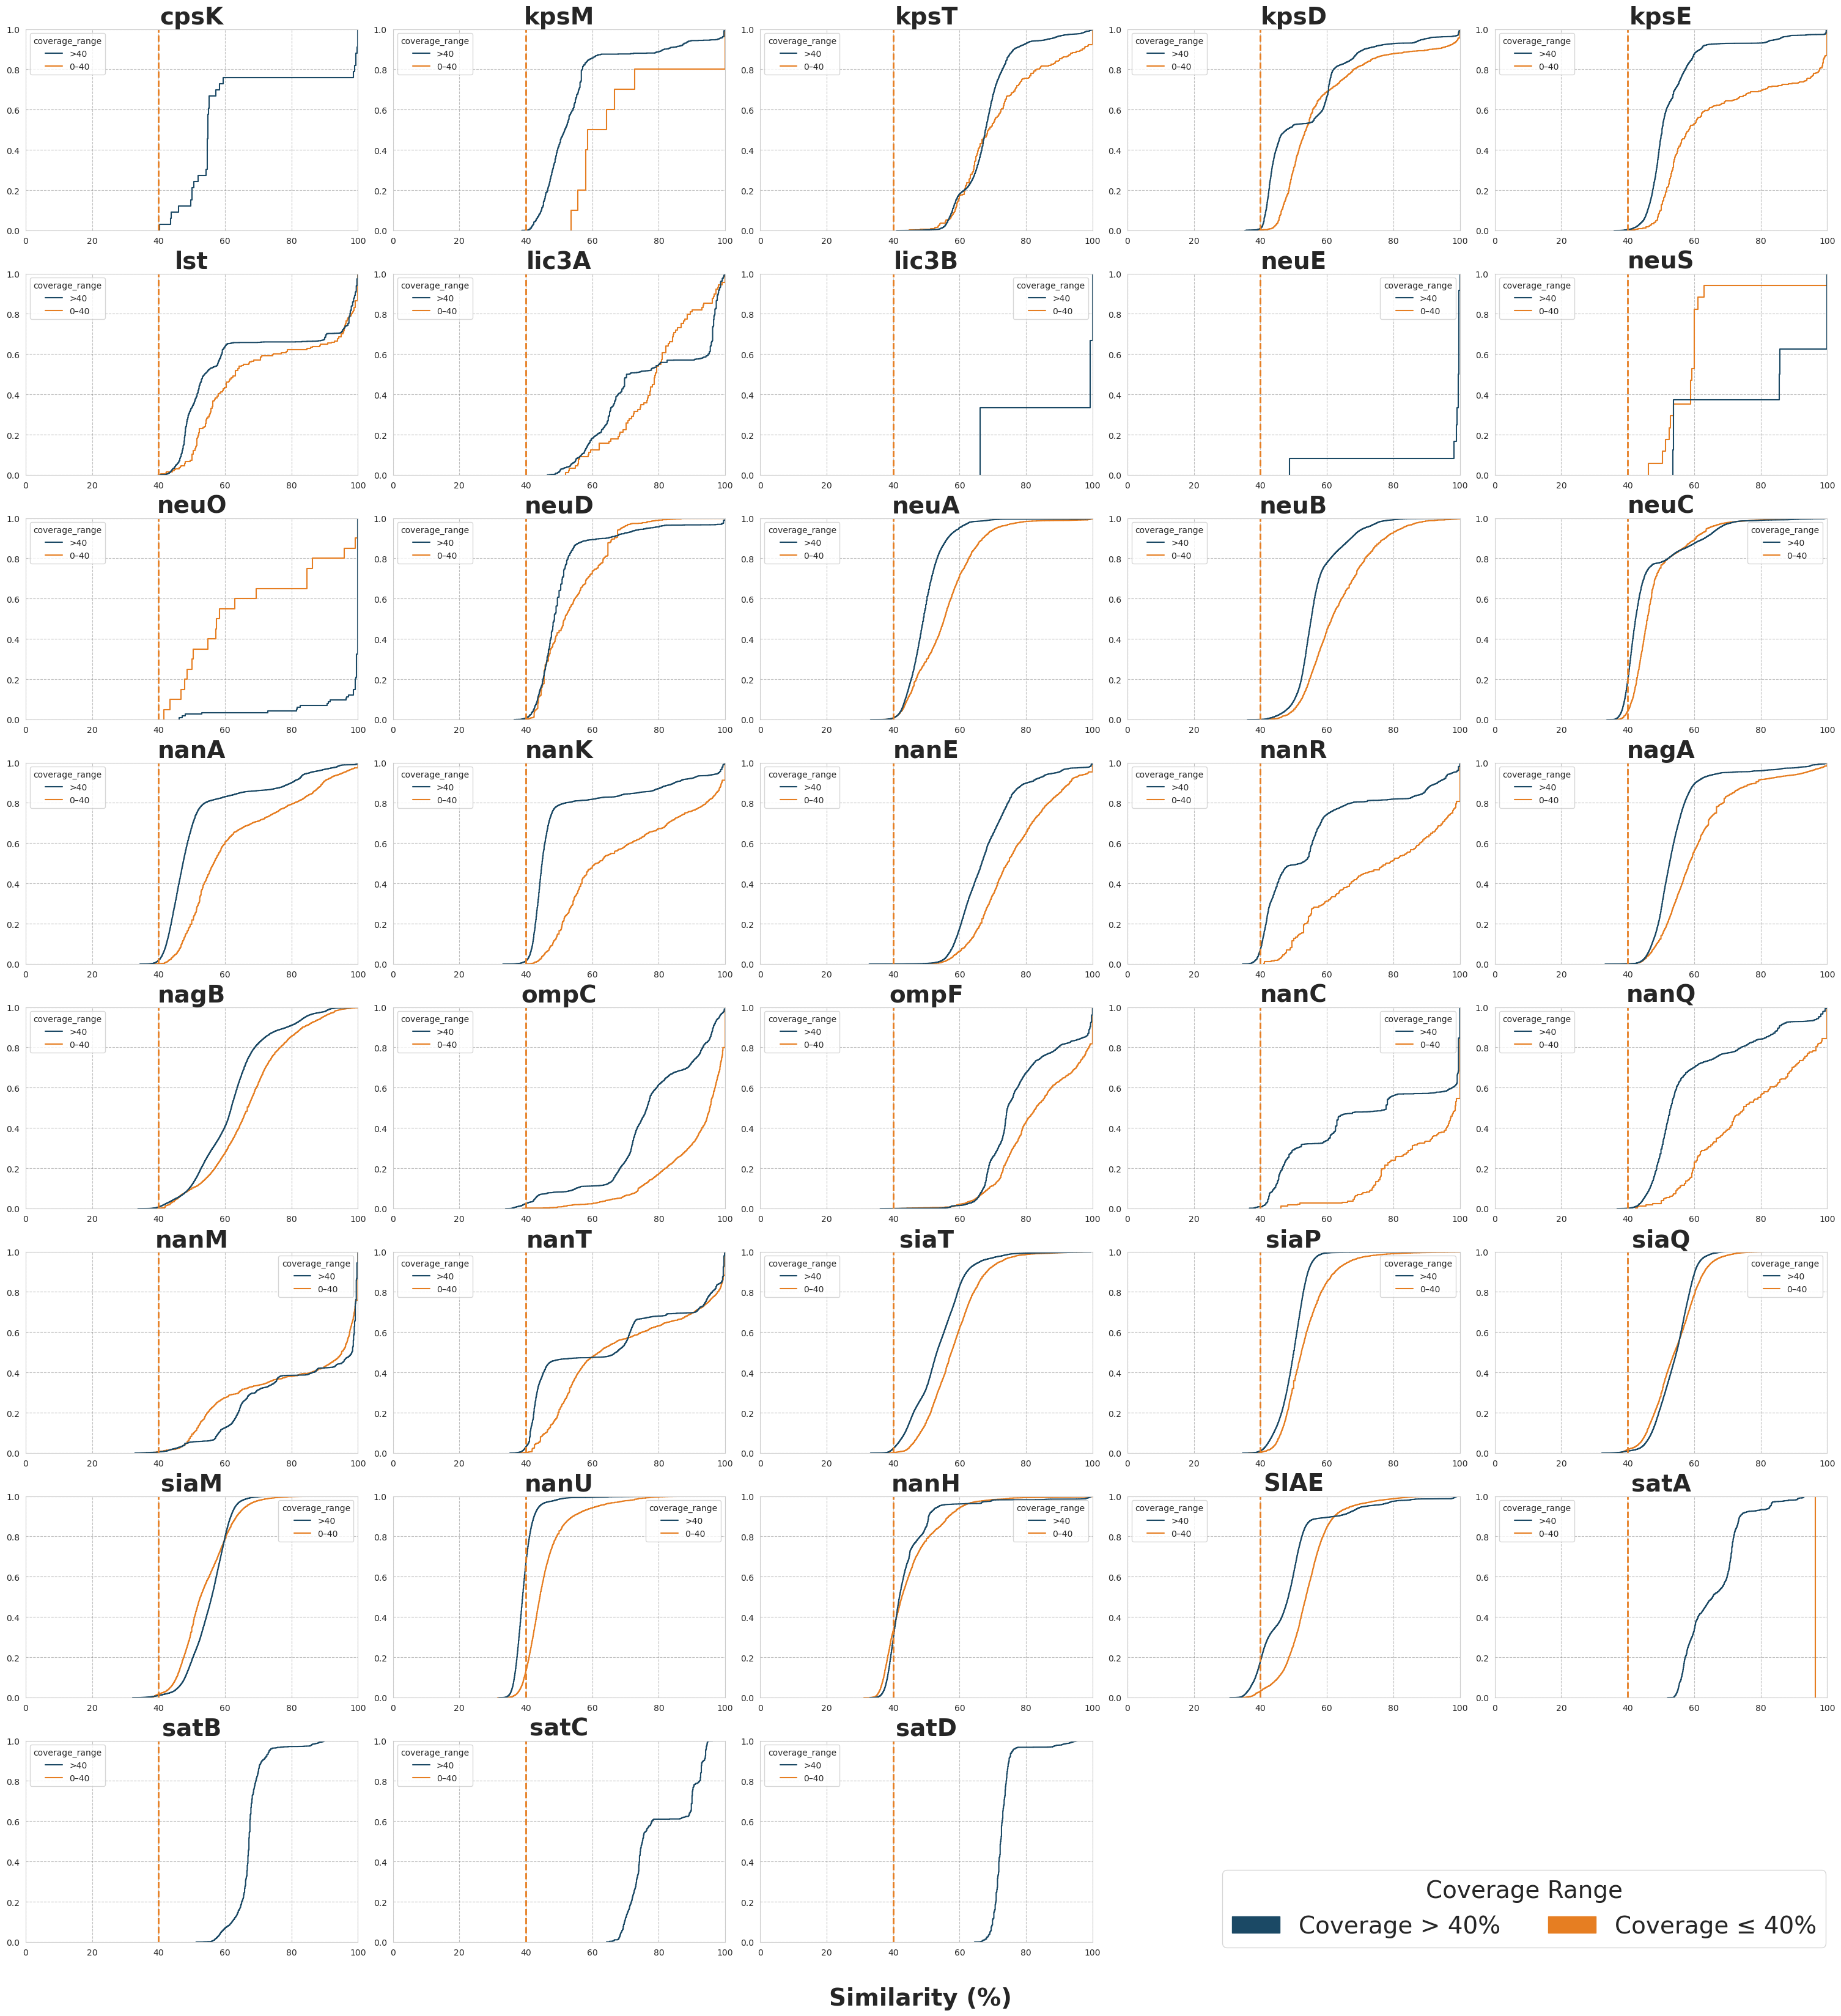

In [ ]:
# ECDF (Empirical Cumulative Distribution Function)

df = pd.read_csv("./csvs/df_all_aligned.csv")

# Colors
coverage_colors = {
    "0–40": "#E67E22",
    ">40": "#1b4965",
}

# Coverage classification
df["coverage_range"] = np.where(df["coverage"] <= 40, "0–40", ">40")
df["coverage_range"] = pd.Categorical(
    df["coverage_range"],
    categories=["0–40", ">40"],
    ordered=True
)

order = [
    "cpsK", "kpsM", "kpsT", "kpsD", "kpsE", "lst", "lic3A", "lic3B", "neuE", "neuS",
    "neuO", "neuD", "neuA", "neuB", "neuC", "nanA", "nanK", "nanE", "nanR", "nagA",
    "nagB", "ompC", "ompF", "nanC", "nanQ", "nanM", "nanT", "siaT", "siaP", "siaQ",
    "siaM", "nanU", "nanH", "SIAE", "satA", "satB", "satC", "satD"
]

# Keep only genes that exist in the dataframe
genes = [g for g in order if g in df["gene"].unique()]

# Grid
n = len(genes)
ncols = 5
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(ncols * 6, nrows * 4),
    constrained_layout=True
)
axes = axes.flatten()

# Loop through genes
for i, gene in enumerate(genes):
    df_gene = df[df["gene"] == gene]

    # ECDF stratified by coverage
    sns.ecdfplot(
        data=df_gene,
        x="ppos",
        hue="coverage_range",
        hue_order=[">40", "0–40"],
        palette=coverage_colors,
        ax=axes[i]
    )

    # Vertical threshold line
    axes[i].axvline(x=40, color="#E67E22", linestyle="--", linewidth=2)

    # Title
    axes[i].set_title(str(gene), fontsize=28, fontweight="bold")

    # Grid
    axes[i].grid(True, linestyle="--", alpha=0.5, color="gray")

    # X limits
    axes[i].set_xlim(0, 100)

    # Remove individual axis labels
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global X-axis label
fig.text(
    0.5, -0.02, "Similarity (%)",
    ha="center", va="center",
    fontsize=28, fontweight="bold"
)

# Manual legend
patches = [
    mpatches.Patch(color="#1b4965", label="Coverage > 40%"),
    mpatches.Patch(color="#E67E22", label="Coverage ≤ 40%")
]

fig.legend(
    handles=patches,
    title="Coverage Range",
    loc="lower right",
    bbox_to_anchor=(1.0, 0.0),
    ncol=2,
    fontsize=28,
    title_fontsize=28
)

plt.savefig(
    "Figure_similarity_coverage_ECDF.pdf",
    format="pdf",
    bbox_inches="tight",
    dpi=300
)

plt.show()

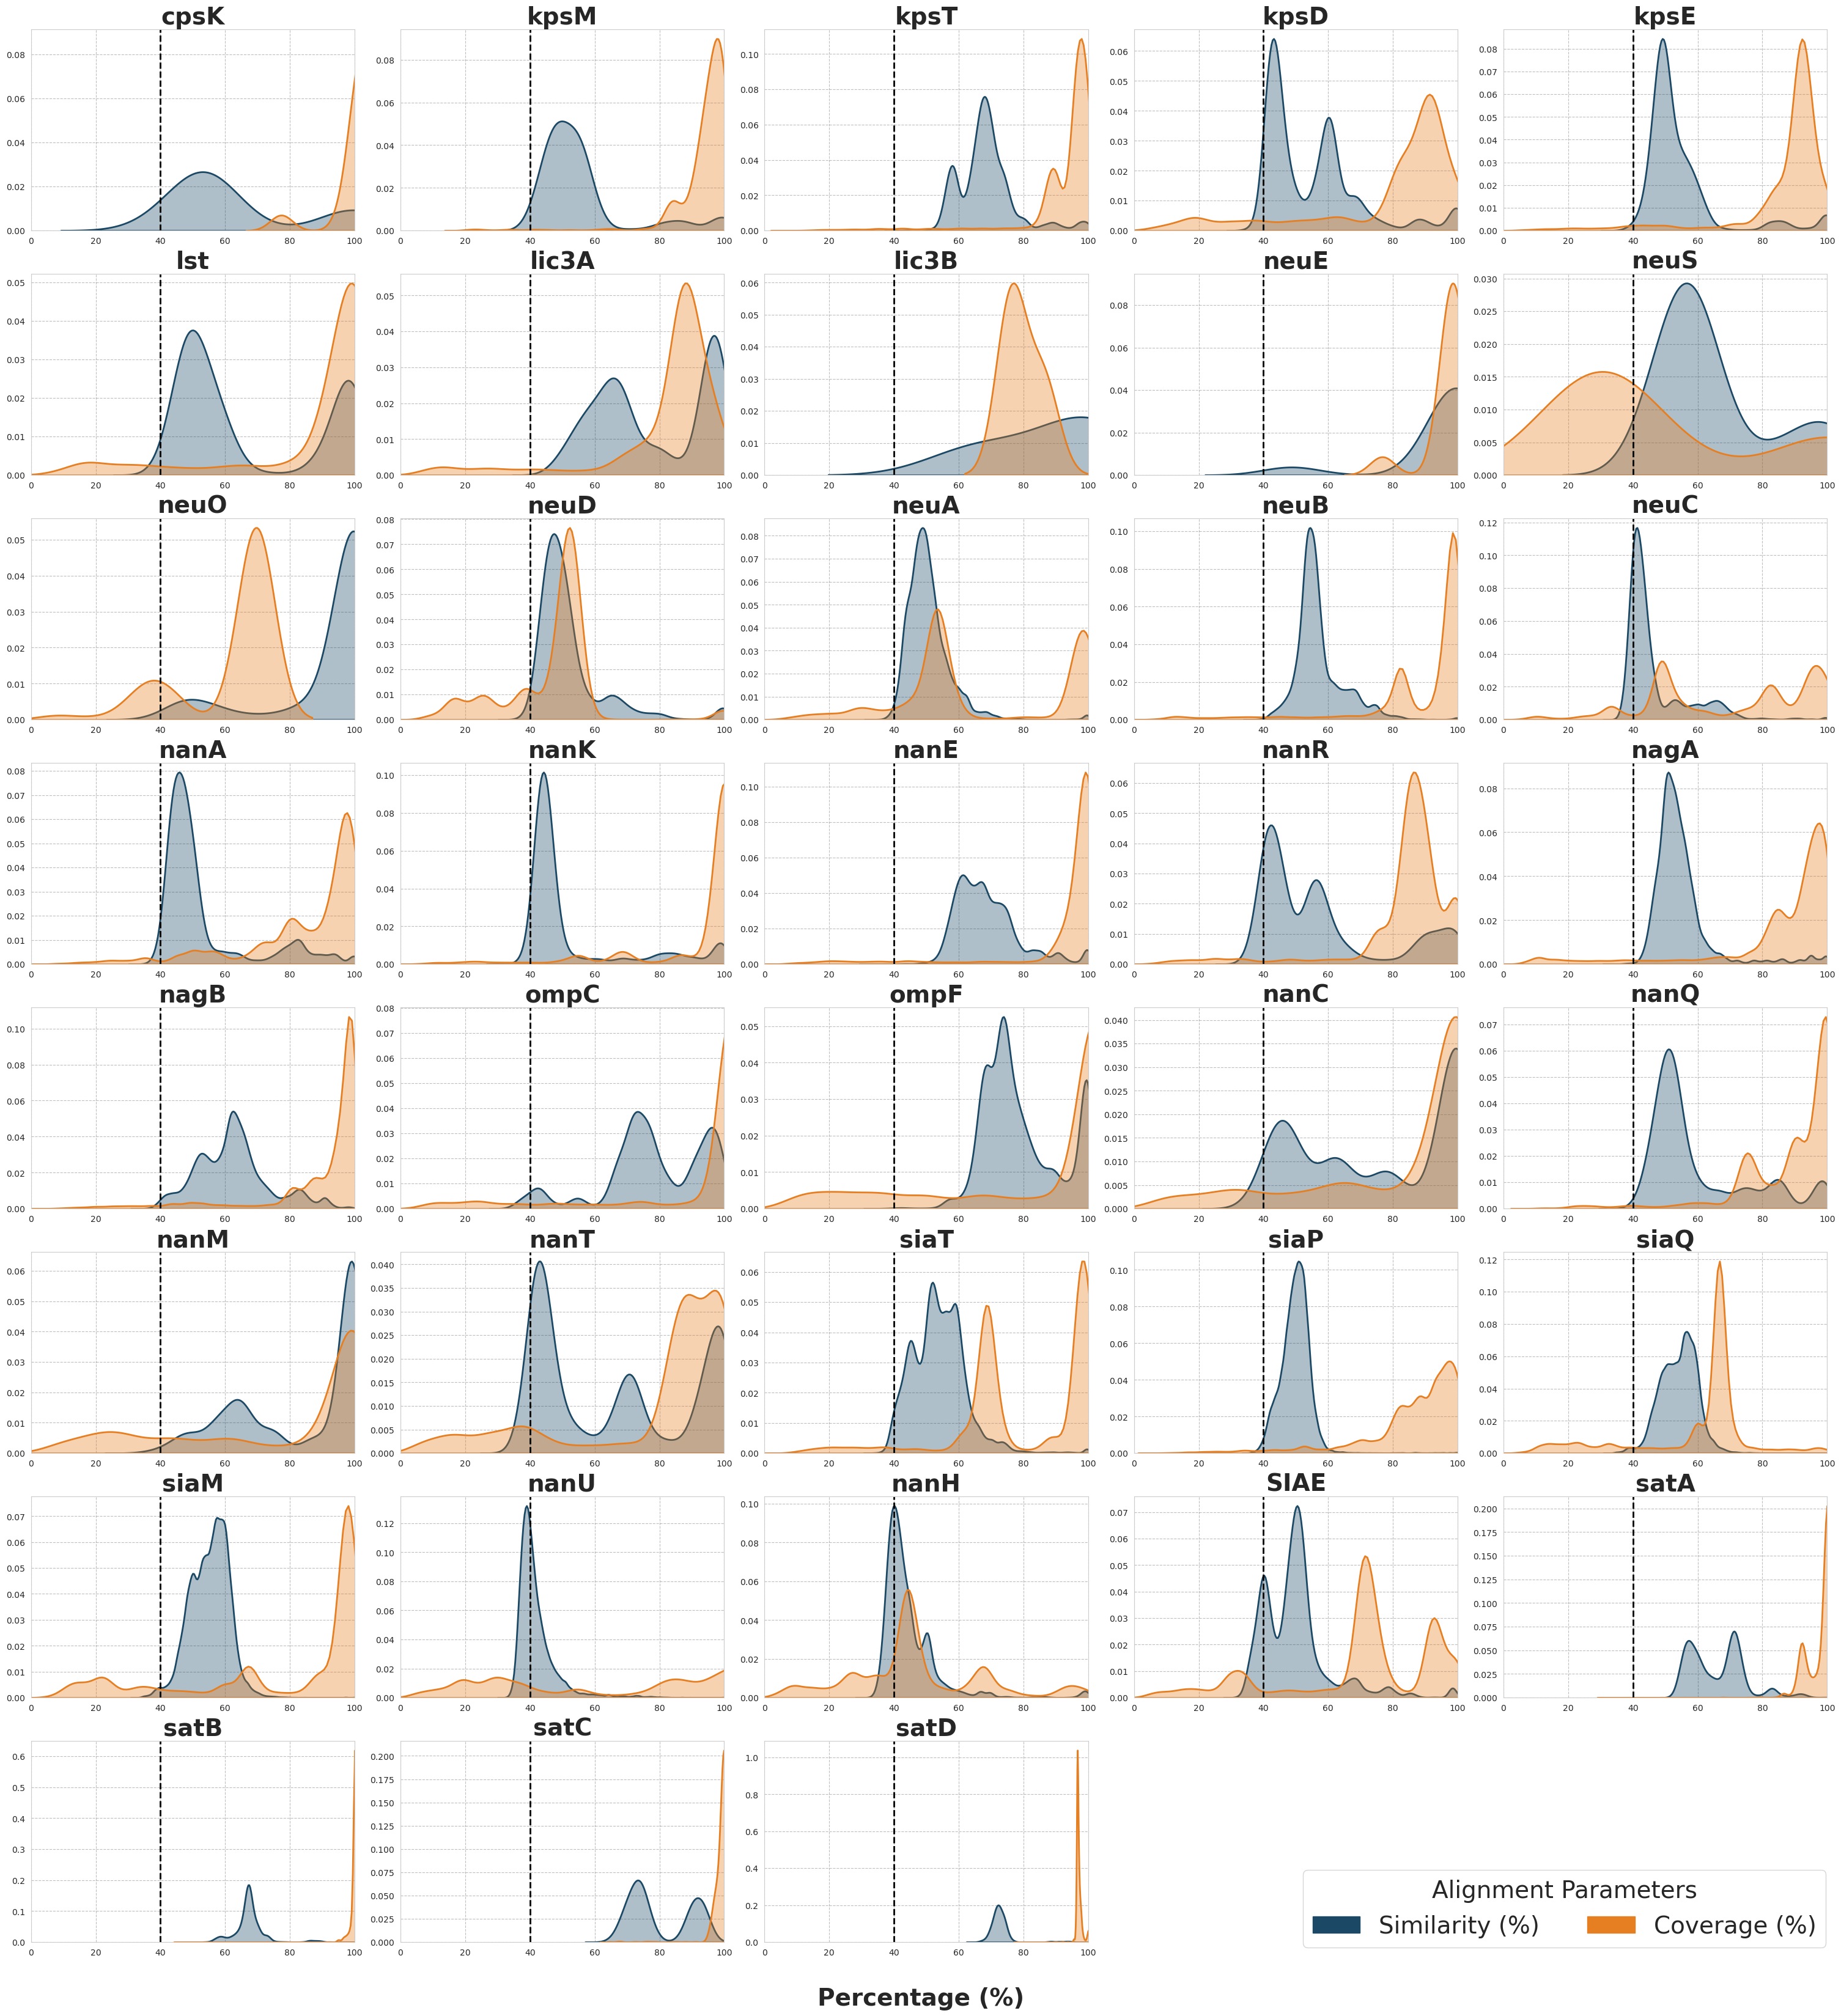

In [ ]:
# Read your DataFrame
df = pd.read_csv("./csvs/df_all_aligned.csv")

# Colors
similarity_color = "#1b4965"
coverage_color = "#E67E22"

order = [
    "cpsK", "kpsM", "kpsT", "kpsD", "kpsE", "lst", "lic3A", "lic3B", "neuE", "neuS",
    "neuO", "neuD", "neuA", "neuB", "neuC", "nanA", "nanK", "nanE", "nanR", "nagA",
    "nagB", "ompC", "ompF", "nanC", "nanQ", "nanM", "nanT", "siaT", "siaP", "siaQ",
    "siaM", "nanU", "nanH", "SIAE", "satA", "satB", "satC", "satD"
]

genes = [g for g in order if g in df["gene"].unique()]

# Grid definition
n = len(genes)
ncols = 5
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(ncols * 6, nrows * 4),
    constrained_layout=True
)
axes = axes.flatten()

sns.set_style("whitegrid")

for i, gene in enumerate(genes):
    df_gene = df[df["gene"] == gene]

    # KDE for Similarity
    sns.kdeplot(
        df_gene["ppos"],
        fill=True,
        alpha=0.35,
        linewidth=2,
        color=similarity_color,
        label="Similarity (%)",
        ax=axes[i]
    )

    # KDE for Coverage
    sns.kdeplot(
        df_gene["coverage"],
        fill=True,
        alpha=0.35,
        linewidth=2,
        color=coverage_color,
        label="Coverage (%)",
        ax=axes[i]
    )

    # Threshold vertical line
    axes[i].axvline(x=40, color="black", linestyle="--", linewidth=2)

    axes[i].set_title(str(gene), fontsize=28, fontweight="bold")
    axes[i].grid(True, linestyle="--", alpha=0.5, color="gray")
    axes[i].set_xlim(0, 100)

    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global X-axis label
fig.text(
    0.5, -0.02,
    "Percentage (%)",
    ha="center",
    va="center",
    fontsize=28,
    fontweight="bold"
)

# Global legend
patches = [
    mpatches.Patch(color=similarity_color, label="Similarity (%)"),
    mpatches.Patch(color=coverage_color, label="Coverage (%)")
]

fig.legend(
    handles=patches,
    title="Alignment Parameters",
    loc="lower right",
    bbox_to_anchor=(1.0, 0.0),
    ncol=2,
    fontsize=28,
    title_fontsize=28
)

plt.savefig(
    "Figure_similarity_coverage_KDE.pdf",
    format="pdf",
    bbox_inches="tight",
    dpi=300
)

plt.show()